In [1]:
import sqlite3
import pandas as pd
con = sqlite3.connect(r"shipments.db")
df = pd.read_sql_query("SELECT * from sqlite_master",con)

In [2]:
df1 = pd.read_sql_query("SELECT * from Shipment_Cost s join Carrier_Master c on s.FK_CarrierID=c.ID",con)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

df = pd.read_sql_query("SELECT c.ID,Carrier,FreightCost_total,Cast(Weight/10 as float)*10 as Weight,FreightCost_total/Cast(Weight as float) as CostperKg from Shipment_Cost s join Carrier_Master c on s.FK_CarrierID=c.ID join Shipment_Weight w on s.FK_ShipmentID= w.ID ORDER BY Weight ASC ",con)
# print(df)
f1 = df.loc[df['ID'] == 1]
f2 = df.loc[df['ID'] == 2]

In [4]:
df2 = pd.read_sql_query("SELECT d.FK_CarrierID,Carrier,sum(FreightCost_total),sum(Weight),sum(FreightCost_total)/(sum(Weight)) as CostperKg from (SELECT * from Shipment_Cost join Carrier_Master as cm on FK_CarrierID=cm.ID) as d join Shipment_Weight as sw on d.FK_ShipmentID=sw.ID group by d.FK_CarrierID",con)
print(df2)



   FK_CarrierID       Carrier  sum(FreightCost_total)  sum(Weight)  CostperKg
0             1  Freight Ltd.            1.889402e+06     607147.0   3.111936
1             2     Speedport            7.880106e+05     225530.0   3.494039


In [5]:
#manual linear regression

import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(f1['Weight'])
y = np.array(f1['FreightCost_total'])

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x2 = np.array(f2['Weight'])
y2 = np.array(f2['FreightCost_total'])

x2 = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)

reg = LinearRegression(normalize=True).fit(x,y)
reg2 = LinearRegression(normalize=True).fit(x2,y2)



In [6]:
print(reg.score(x,y),reg2.score(x2,y2))

0.7982759639095254 0.9504141999482965


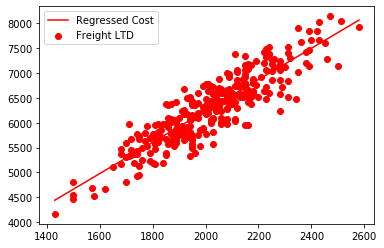

In [7]:
plt.scatter(x,y,color = "red", label = "Freight LTD")
plt.plot(x,reg.predict(x),color = "red", label = "Regressed Cost")
plt.legend()

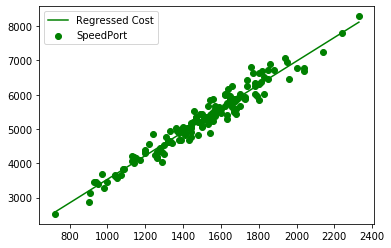

In [8]:
plt.scatter(x2,y2,color = "green", label= "SpeedPort")
plt.plot(x2,reg2.predict(x2),color = "green", label = "Regressed Cost")
plt.legend()

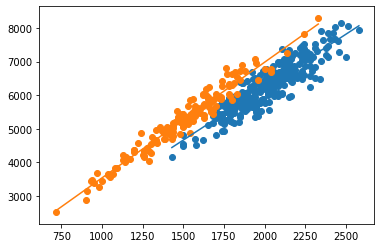

In [9]:
plt.scatter(x,y)
plt.scatter(x2,y2)
plt.plot(x,reg.predict(x))
plt.plot(x2,reg2.predict(x2))

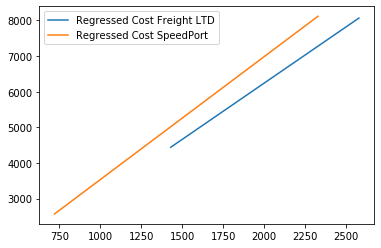

In [10]:
plt.plot(x,reg.predict(x), label = "Regressed Cost Freight LTD")
plt.plot(x2,reg2.predict(x2), label = "Regressed Cost SpeedPort")
plt.legend()